## HIE Data 정리

   1. raw data를 C:\Users\user\Downloads\HIE 폴더에 가져다 놓는다. (HIE 폴더 내에 1, 2, 3, 4 폴더가 각각 생성되도록)
   2. Cell>Run all -> 데이터 변환을 원하는 날짜 입력 (YYYYMMDD) -> 1~4 데이터 자동으로 불러들인 후 RPM 그래프 출력
   3. 작업조건(Sample 명, 평가 RPM, 평가 시간) 입력
   4. xlsx 파일로 내보내기 (파일명 지정 가능)
  
   
   주의. 파일의 생성일을 기준으로 DataFrame이 생성되므로 생성일이 변경되지 않도록 복사/이동 시 주의
   주의2. 1~4 DataFrame의 마지막 Dates 열의 경우 처음 행과 마지막 행의 시간을 기준으로 1/n 하여 중간행들의 시간을 설정했는데, 이게
          생각보다 실제 저장된 시간과의 편차가 심하여 평균값에 오차가 발생하였음 --> 3rdVer 에서는 실제 데이터 저장시간으로 계산

## 1번 자료 DataFrame화

In [102]:
import os
from datetime import datetime 
import pandas as pd

def split_ymdhms(name):                        ##년월일시분초 분할 함수 정의
    return datetime(int(name.split("/")[0])+2000,int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 
             ## raw data 상에서 연도는 끝 두자리만 표현되므로(ex)20, 21 등) 계산 시 0020년으로 인식되는 문제가 발생하여 2000을 더하여 2020년이 되도록 함
             ## raw data 1번폴더
def split_ymdhms2(name):                        ##년월일시분초 분할 함수 정의
    return datetime(int(name.split("/")[0]),int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 
             ## raw data 상에서 연도는 끝 두자리만 표현되므로(ex)20, 21 등) 계산 시 0020년으로 인식되는 문제가 발생하여 2000을 더하여 2020년이 되도록 함
             ## raw data 2번폴더
    
# 결과를 확인하려는 날짜를 입력받음
inputdate=input('결과를 확인하려는 날짜를 입력하세요(YYYYMMDD): ')
input_year=int(inputdate[0:4])
input_month=int(inputdate[4:6])
input_day=int(inputdate[6:8])
#print(input_year,input_month,input_day)   # 8자리 숫자를 연/월/일 구분



path1= "./1"                           ## logging.csv의 folder 주소
list_1 = os.listdir(path1)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_1f = []                            ## 최종 리스트

if len(list_1)==2:                         ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정                
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path1+'\\'+list_1[1]))                  ##logging.csv 의 수정날짜
    path1b = "./1/backup"                   ## 백업파일들의 folder 주소
    list_1b = os.listdir(path1b)
    
    for i in range(len(list_1b)):
        fileMtime_1b = datetime.fromtimestamp(os.path.getmtime(path1b+'\\'+list_1b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day)==(fileMtime_1b.year, fileMtime_1b.month, fileMtime_1b.day): ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_1f.append(list_1b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
#            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate)<int(str(fileMtime_1b.year)+str(fileMtime_1b.month).zfill(2)+str(fileMtime_1b.day)): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_1f.append(list_1b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue
            
#list_1f

# csv 파일 내용을 DF 화
    for l1 in range(len(list_1f)):
        df=pd.read_csv(path1b+'\\'+list_1f[l1], encoding='utf_16')
        if l1==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame1=['']*18
            df_1=pd.DataFrame(frame1).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_1.loc[len(df_1)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path1+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_1)==1:
    for i in range(3):
        df=df.drop(i)
    frame1=['']*18
    df_1=pd.DataFrame(frame1).T
elif len(list_1f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame1=['']*18
    df_1=pd.DataFrame(frame1).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_1.loc[len(df_1)]=df.iloc[j][0].split(sep='\t') 

df_1=df_1.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_1.columns=df_1.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_1=df_1.drop(1)      

## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
for i in range(df_1.index[0], df_1.index[len(df_1)-1]):
    if df_1['Date'].loc[i].split(' ')[0]!=(str(input_year)[2:4]+'/'+str(input_month)+'/'+str(input_day)):
        df_1=df_1.drop(i)

df_1=df_1.drop(df_1.index[len(df_1)-1])                # 마지막 행을 삭제 ## drop:행삭제, index[] 해당 행의 제목 찾기

## 시간흐름을 표현하는 Dates 열 생성
df_1['Dates']=df_1.Date.apply(split_ymdhms)                              ## datatime 활용하여 시간을 str에서 변경
df_1_start=df_1['Dates'].iloc[0]
df_1_end=df_1['Dates'].iloc[len(df_1)-1]
df_1_delta=(df_1_end-df_1_start)/(len(df_1)-1)
 #df_1_delta
for i in range(len(df_1)):
    df_1['Dates'].iloc[i]=df_1_start+df_1_delta*i                        ## 전체의 처음과 끝을 설정하여 n 수로 나누어 각 행의 시간을 계산(1번 logging 시 초까지 동일한 행이 있기 때문)



df_1

#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

#print ("file_list: {}".format(file_list_1))
#print ("file_list: {}".format(file_list_1b))

결과를 확인하려는 날짜를 입력하세요(YYYYMMDD): 20201228


1,No.,Status,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,,Dates
1059,34,Logging Completed,20/12/28 12:15:51,0,0,3,0,4,4,5,0,0,3,0,1,1,0,,2020-12-28 12:15:51.000000000
1060,35,Logging Completed,20/12/28 12:15:52,0,0,3,0,4,4,5,0,0,3,0,1,1,0,,2020-12-28 12:15:51.600287488
1061,36,Logging Completed,20/12/28 12:15:52,0,0,4,0,4,4,5,1,1,3,0,1,2,0,,2020-12-28 12:15:52.200575232
1062,37,Logging Completed,20/12/28 12:15:53,0,0,3,0,4,4,5,0,0,3,0,1,2,0,,2020-12-28 12:15:52.800862720
1063,38,Logging Completed,20/12/28 12:15:53,0,0,3,0,5,4,5,0,0,3,0,1,2,0,,2020-12-28 12:15:53.401150208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,184,Logging Completed,20/12/28 13:39:19,69,89,206,212,377,399,389,406,422,419,405,402,378,296,,2020-12-28 13:39:18.598842112
9402,185,Logging Completed,20/12/28 13:39:19,85,114,227,180,397,414,404,409,435,415,414,410,385,296,,2020-12-28 13:39:19.199129856
9403,186,Logging Completed,20/12/28 13:39:20,25,130,246,192,343,428,417,420,403,419,388,418,389,296,,2020-12-28 13:39:19.799417344
9404,187,Logging Completed,20/12/28 13:39:21,41,67,265,203,361,384,422,399,406,406,394,395,371,296,,2020-12-28 13:39:20.399704832


In [144]:
df_1.loc[6213]

1
No.                                  68
Status                Logging Completed
Date                    20/12/28 13:7:2
6.5D                                 44
8.0D                                 25
9.5D                                 93
11.0D                                70
12.5D                               207
14.0D                               226
15.5D                               227
17.0D                               249
18.5D                               285
20.0D                               283
21.5D                               299
23.0D                               312
24-BP                               300
25-BP                               231
                                       
Dates     2020-12-28 13:07:24.882094592
Name: 6213, dtype: object

## 2번 자료 DataFrame화

In [104]:
path2= "./2"                           ## logging.csv의 folder 주소
list_2 = os.listdir(path2)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_2f = []                            ## 최종 리스트

if len(list_2)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path2+'\\'+list_2[1]))                  ##logging.csv 의 수정날짜
    path2b = "./2/backup"                   ## 백업파일들의 folder 주소
    list_2b = os.listdir(path2b)
    
    for i in range(len(list_2b)):
        fileMtime_2b = datetime.fromtimestamp(os.path.getmtime(path2b+'\\'+list_2b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day)==(fileMtime_2b.year, fileMtime_2b.month, fileMtime_2b.day): ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_2f.append(list_2b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
#            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate)<int(str(fileMtime_2b.year)+str(fileMtime_2b.month).zfill(2)+str(fileMtime_2b.day)): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_2f.append(list_2b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue

# csv 파일 내용을 DF 화
    for l2 in range(len(list_2f)):
        df=pd.read_csv(path2b+'\\'+list_2f[l2], encoding='utf_16')
        if l2==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame2=['']*18
            df_2=pd.DataFrame(frame2).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_2.loc[len(df_2)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path2+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_2)==1:
    for i in range(3):
        df=df.drop(i)
    frame2=['']*18
    df_2=pd.DataFrame(frame2).T
elif len(list_2f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame2=['']*18
    df_2=pd.DataFrame(frame2).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_2.loc[len(df_2)]=df.iloc[j][0].split(sep='\t') 

df_2=df_2.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_2.columns=df_2.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_2=df_2.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
for i in range(df_2.index[0], df_2.index[len(df_2)-1]):
    if df_2['Date'].loc[i].split(' ')[0]!=(str(input_year)[0:4]+'/'+str(input_month)+'/'+str(input_day)):
        df_2=df_2.drop(i)

df_2=df_2.drop(df_2.index[len(df_2)-1])                # 마지막 행을 삭제 ## drop:행삭제, index[] 해당 행의 제목 찾기
        
        

## 시간흐름을 표현하는 Dates 열 생성
df_2['Dates']=df_2.Date.apply(split_ymdhms2)                              ## datatime 활용하여 시간을 str에서 변경
df_2_start=df_2['Dates'].iloc[0]
df_2_end=df_2['Dates'].iloc[len(df_2)-1]
df_2_delta=(df_2_end-df_2_start)/(len(df_2)-1)
#df_2_delta
for i in range(len(df_2)):
    df_2['Dates'].iloc[i]=df_2_start+df_2_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)



df_2

1,No.,Status,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,,Dates
1478,453,Logging Completed,2020/12/28 8:5:46,16,13,14,16,17,15,16,17,18,14,15,18,18,16,,2020-12-28 08:05:46.000000000
1479,454,Logging Completed,2020/12/28 8:5:55,16,13,14,16,17,15,16,17,18,14,15,18,18,16,,2020-12-28 08:06:07.968166912
1480,455,Logging Completed,2020/12/28 8:6:5,16,13,14,16,17,15,16,17,18,14,15,18,18,16,,2020-12-28 08:06:29.936333824
1481,456,Logging Completed,2020/12/28 8:6:15,16,13,14,16,17,15,16,17,18,14,15,18,18,16,,2020-12-28 08:06:51.904500480
1482,457,Logging Completed,2020/12/28 8:6:25,16,13,14,16,17,15,16,17,18,14,15,18,18,16,,2020-12-28 08:07:13.872667392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,336,Logging Completed,2020/12/28 13:38:39,93,93,102,103,102,103,110,112,114,112,109,107,114,121,,2020-12-28 13:37:51.127332096
2386,337,Logging Completed,2020/12/28 13:38:49,94,94,103,103,102,104,110,112,115,113,110,107,114,121,,2020-12-28 13:38:13.095499008
2387,338,Logging Completed,2020/12/28 13:38:59,94,94,103,103,102,104,110,113,115,113,110,107,114,122,,2020-12-28 13:38:35.063665664
2388,339,Logging Completed,2020/12/28 13:39:9,95,95,103,103,103,104,111,113,115,113,111,108,115,123,,2020-12-28 13:38:57.031832576


## 3번 자료 DataFrame화

In [105]:
path3= "./3"                           ## logging.csv의 folder 주소
list_3 = os.listdir(path3)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_3f = []                            ## 최종 리스트

if len(list_3)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path3+'\\'+list_3[1]))                  ##logging.csv 의 수정날짜
    path3b = "./3/backup"                   ## 백업파일들의 folder 주소
    list_3b = os.listdir(path3b)
    
    for i in range(len(list_3b)):
        fileMtime_3b = datetime.fromtimestamp(os.path.getmtime(path3b+'\\'+list_3b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day)==(fileMtime_3b.year, fileMtime_3b.month, fileMtime_3b.day): ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_3f.append(list_3b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
#            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate)<int(str(fileMtime_3b.year)+str(fileMtime_3b.month).zfill(2)+str(fileMtime_3b.day)): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_3f.append(list_3b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue
            
# csv 파일 내용을 DF 화
    for l3 in range(len(list_3f)):
        df=pd.read_csv(path3b+'\\'+list_3f[l3], encoding='utf_16')
        if l3==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame3=['']*18
            df_3=pd.DataFrame(frame3).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_3.loc[len(df_3)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path3+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_3)==1:
    for i in range(3):
        df=df.drop(i)
    frame3=['']*18
    df_3=pd.DataFrame(frame3).T
elif len(list_3f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame3=['']*18
    df_3=pd.DataFrame(frame3).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_3.loc[len(df_3)]=df.iloc[j][0].split(sep='\t') 

df_3=df_3.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_3.columns=df_3.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_3=df_3.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
for i in range(df_3.index[0], df_3.index[len(df_3)-1]):
    if df_3['Date'].loc[i].split(' ')[0]!=(str(input_year)[0:4]+'/'+str(input_month)+'/'+str(input_day)):
        df_3=df_3.drop(i)

df_3=df_3.drop(df_3.index[len(df_3)-1])                # 마지막 행을 삭제 ## drop:행삭제, index[] 해당 행의 제목 찾기

## 시간흐름을 표현하는 Dates 열 생성
df_3['Dates']=df_3.Date.apply(split_ymdhms2)                              ## datatime 활용하여 시간을 str에서 변경
df_3_start=df_3['Dates'].iloc[0]
df_3_end=df_3['Dates'].iloc[len(df_3)-1]
df_3_delta=(df_3_end-df_3_start)/(len(df_3)-1)
#df_3_delta
for i in range(len(df_3)):
    df_3['Dates'].iloc[i]=df_3_start+df_3_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)

df_3

1,No.,Status,Date,피드,Zone1,Zone2,Zone3,Zone4,Zone5,Zone6,클램프,네 크,헤 드,다 이,TC #1,TC #2,25-BP,,Dates
1478,453,Logging Completed,2020/12/28 8:5:46,0,15,15,15,15,15,16,15,16,16,16,16,17,16,,2020-12-28 08:05:46.000000000
1479,454,Logging Completed,2020/12/28 8:5:55,0,15,15,15,15,16,16,15,16,16,16,16,17,16,,2020-12-28 08:06:07.968166912
1480,455,Logging Completed,2020/12/28 8:6:5,0,15,15,15,15,16,16,15,16,16,16,16,17,16,,2020-12-28 08:06:29.936333824
1481,456,Logging Completed,2020/12/28 8:6:15,0,15,15,15,16,16,16,16,16,16,16,16,17,16,,2020-12-28 08:06:51.904500480
1482,457,Logging Completed,2020/12/28 8:6:25,0,15,15,15,16,16,16,16,16,16,16,16,17,16,,2020-12-28 08:07:13.872667392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,336,Logging Completed,2020/12/28 13:38:39,0,90,101,100,105,105,105,115,116,115,116,125,121,121,,2020-12-28 13:37:51.127332096
2386,337,Logging Completed,2020/12/28 13:38:49,0,91,102,100,105,105,105,115,116,116,116,125,121,121,,2020-12-28 13:38:13.095499008
2387,338,Logging Completed,2020/12/28 13:38:59,0,91,102,101,105,106,105,116,116,116,116,125,122,122,,2020-12-28 13:38:35.063665664
2388,339,Logging Completed,2020/12/28 13:39:9,0,92,102,101,106,106,106,116,117,117,116,126,122,123,,2020-12-28 13:38:57.031832576


## 4번 자료 DataFrame화

In [107]:

path4= "./4"                           ## logging.csv의 folder 주소
list_4 = os.listdir(path4)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_4f = []                            ## 최종 리스트

if len(list_4)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path4+'\\'+list_4[1]))                  ##logging.csv 의 수정날짜
    path4b = "./4/backup"                   ## 백업파일들의 folder 주소
    list_4b = os.listdir(path4b)
    
    for i in range(len(list_4b)):
        fileMtime_4b = datetime.fromtimestamp(os.path.getmtime(path4b+'\\'+list_4b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day)==(fileMtime_4b.year, fileMtime_4b.month, fileMtime_4b.day): ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_4f.append(list_4b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
#            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate)<int(str(fileMtime_4b.year)+str(fileMtime_4b.month).zfill(2)+str(fileMtime_4b.day)): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_4f.append(list_4b[i])                                           ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue
#list_4f

# csv 파일 내용을 DF 화
    for l4 in range(len(list_4f)):
        df=pd.read_csv(path4b+'\\'+list_4f[l4], encoding='utf_16')
        if l4==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame4=['']*18
            df_4=pd.DataFrame(frame4).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_4.loc[len(df_4)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path4+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_4)==1:
    for i in range(3):
        df=df.drop(i)
    frame4=['']*18
    df_4=pd.DataFrame(frame4).T
elif len(list_4f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame4=['']*18
    df_4=pd.DataFrame(frame4).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_4.loc[len(df_4)]=df.iloc[j][0].split(sep='\t') 

df_4=df_4.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_4.columns=df_4.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_4=df_4.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
for i in range(df_4.index[0], df_4.index[len(df_4)-1]):
    if df_4['Date'].loc[i].split(' ')[0]!=(str(input_year)[0:4]+'/'+str(input_month)+'/'+str(input_day)):
        df_4=df_4.drop(i)

df_4=df_4.drop(df_4.index[len(df_4)-1])                # 마지막 행을 삭제 ## drop:행삭제, index[] 해당 행의 제목 찾기        
        
#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

## 시간흐름을 표현하는 Dates 열 생성
df_4['Dates']=df_4.Date.apply(split_ymdhms2)                              ## datatime 활용하여 시간을 str에서 변경
df_4_start=df_4['Dates'].iloc[0]
df_4_end=df_4['Dates'].iloc[len(df_4)-1]
df_4_delta=(df_4_end-df_4_start)/(len(df_4)-1)
df_4_delta
for i in range(len(df_4)):
    df_4['Dates'].iloc[i]=df_4_start+df_4_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)

df_4

1,No.,Status,Date,스크류,모터회전,모터부하,냉각#1,냉각#2,Para 1,Para 2,Para 3,Para 4,Para 5,Para 6,Para 7,Para 8,Para 9,,Dates
1721,696,Logging Completed,2020/12/28 12:15:59,5.1,131,34,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 12:15:59.000000000
1722,697,Logging Completed,2020/12/28 12:16:9,4.9,127,39,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 12:16:04.027108352
1723,698,Logging Completed,2020/12/28 12:16:14,5.0,129,40,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 12:16:09.054216960
1724,699,Logging Completed,2020/12/28 12:16:19,5.0,130,41,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 12:16:14.081325312
1725,700,Logging Completed,2020/12/28 12:16:24,5.1,133,41,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 12:16:19.108433664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,664,Logging Completed,2020/12/28 13:39:6,30.0,776,437,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 13:39:05.891565568
2714,665,Logging Completed,2020/12/28 13:39:11,30.1,780,431,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 13:39:10.918673920
2715,666,Logging Completed,2020/12/28 13:39:16,30.0,778,428,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 13:39:15.945782528
2716,667,Logging Completed,2020/12/28 13:39:21,30.0,777,417,1190,1187,0,0,0,0,0,0,0,0,0,,2020-12-28 13:39:20.972890880


## RPM Graph

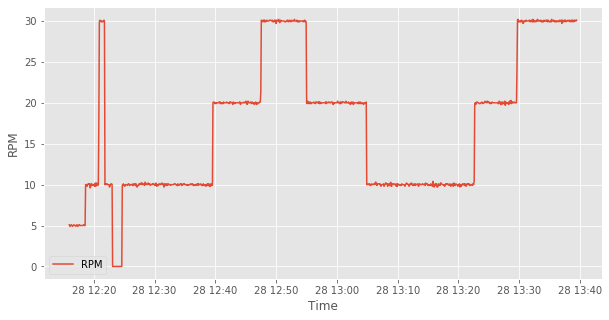

In [109]:
import matplotlib.pyplot as plt
df_4a=df_4
df_4a=df_4a.astype({'스크류':float})                     ## 컬럼을 통째로 str -> int로 변환

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.plot(df_4a['Dates'],df_4a['스크류'], label='RPM')
#plt.plot(df_4a['Dates'],df_4a['모터부하'], label='Load')
plt.legend()
plt.show()

## 평가 정보 입력 (샘플명, RPM, 평가 시간 등)

In [110]:
import pandas as pd
test_name=input('샘플명을 입력하세요(구분:쉼표): ').split(',')
test_rpm=input('RPM 조건을 입력하세요(구분:쉼표): ').split(',')
test_no=0
test_aa=['']*3
test_list=pd.DataFrame(test_aa).T
for i in range(len(test_name)):
    for j in range(len(test_rpm)):
        test_sample=[]
        test_sample.append(test_no)
        test_sample.append(test_name[i])
        test_sample.append(test_rpm[j])
        test_list.loc[test_no]=test_sample
        test_no+=1
test_list.columns=['No','Sample','RPM']
test_list.index=test_list.No
del test_list['No']
print(test_list)
test_exclud=input('평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표): ').split(',')
for i in range(len(test_exclud)):
    test_list=test_list.drop(int(test_exclud[i]))

test_list.reset_index(drop=True, inplace=True)                            ## 평가하지 않은 조건을 잘라내고 다시 인덱스 설정
print(test_list)

#평가시간 입력받기
test_time=['']*(len(test_list))
test_time2=['']*(len(test_list))
print('시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)')
yy=int(df_4.iloc[0,2].split('/')[0])                            ## 평가 시작시간/종료시간을 datetime 함수로 변환하기 위해, 연/월/일 설정
mm=int(df_4.iloc[0,2].split('/')[1])
dd=int(df_4.iloc[0,2].split('/')[2].split()[0])
for i in range(len(test_list)):    
    test_time[i]=input(str(i)+'. Sample:'+test_list.iloc[i,0]+', RPM: '+test_list.iloc[i,1]+': ')    ## DataFrame에서 특정 셀의 값 읽기
    test_time2[i]=test_time[i].split('~') 
    for j in range(2):
        test_time2[i][j]=test_time2[i][j]+':00'                  ## 초 단위 입력하지 않았을 때 오류 생기는 것을 방지하기 위해 00초 붙임
        test_time2[i][j]=datetime(input_year,input_month,input_day,int(test_time2[i][j].split(':')[0]),int(test_time2[i][j].split(':')[1]),int(test_time2[i][j].split(':')[2]))
        
# test_time2: 입력시간을 전/후로 나눈 뒤 datetime 함수를 먹인 것 ==> 이제 df_1~df4 의 Dates와 연동시킬 수 있다.





## df_1_Final 포맷 만들기
df_1_Final=pd.DataFrame(columns=['Sample','RPM','Time','6.5D','8.0D','9.5D','11.0D','12.5D','14.0D','15.5D','17.0D','18.5D','20.0D','21.5D','23.0D','24-BP','25-BP'])

for tl in range(len(test_list)):
    df_1_element=[]
    df_1_element.append(test_list.iloc[tl,0])
    df_1_element.append(test_list.iloc[tl,1])
    df_1_element.append(test_time[tl])
                             
    df_1_a=df_1[(df_1['Dates']>test_time2[tl][0])&(df_1['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_1_a=df_1_a.astype({df_1_a.columns[i]:int})
        df_1_element.append(df_1_a[df_1_a.columns[i]].mean())
    df_1_Final.loc[tl]=df_1_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_1_Final


## df_2_Final 포맷 만들기
df_2_Final=pd.DataFrame(columns=['Sample','RPM','Time','6.5D','8.0D','9.5D','11.0D','12.5D','14.0D','15.5D','17.0D','18.5D','20.0D','21.5D','23.0D','24-BP','25-BP'])

for tl in range(len(test_list)):
    df_2_element=[]
    df_2_element.append(test_list.iloc[tl,0])
    df_2_element.append(test_list.iloc[tl,1])
    df_2_element.append(test_time[tl])
                             
    df_2_a=df_2[(df_2['Dates']>test_time2[tl][0])&(df_2['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_2_a=df_2_a.astype({df_2_a.columns[i]:int})
        df_2_element.append(df_2_a[df_2_a.columns[i]].mean())
    df_2_Final.loc[tl]=df_2_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_2_Final


## df_3_Final 포맷 만들기
df_3_Final=pd.DataFrame(columns=['Sample','RPM','Time','피드','Zone1','Zone2','Zone3','Zone4','Zone5','Zone6','클램프','네크','헤드','다이','TC#1','TC#2','25-BP'])

for tl in range(len(test_list)):
    df_3_element=[]
    df_3_element.append(test_list.iloc[tl,0])
    df_3_element.append(test_list.iloc[tl,1])
    df_3_element.append(test_time[tl])
                             
    df_3_a=df_3[(df_3['Dates']>test_time2[tl][0])&(df_3['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_3_a=df_3_a.astype({df_3_a.columns[i]:int})
        df_3_element.append(df_3_a[df_3_a.columns[i]].mean())
    df_3_Final.loc[tl]=df_3_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_3_Final


## df_4_Final 포맷 만들기
df_4_Final=pd.DataFrame(columns=['Sample','RPM','Time','스크류','모터회전','모터부하','냉각#1','냉각#2','Para1','Para2','Para3','Para4','Para5','Para6','Para7','Para8','Para9'])

for tl in range(len(test_list)):
    df_4_element=[]
    df_4_element.append(test_list.iloc[tl,0])
    df_4_element.append(test_list.iloc[tl,1])
    df_4_element.append(test_time[tl])
                             
    df_4_a=df_4[(df_4['Dates']>test_time2[tl][0])&(df_4['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_4_a=df_4_a.astype({df_4_a.columns[i]:float})                                 ## 스크류 rpm이 소수첫째자리까지 측정되므로 float로 변환
        df_4_element.append(df_4_a[df_4_a.columns[i]].mean())
    df_4_Final.loc[tl]=df_4_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_4_Final

샘플명을 입력하세요(구분:쉼표): aa,vv
RPM 조건을 입력하세요(구분:쉼표): 10,30
   Sample RPM
No           
0      aa  10
1      aa  30
2      vv  10
3      vv  30
평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표): 2,1
  Sample RPM
0     aa  10
1     vv  30
시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)
0. Sample:aa, RPM: 10: 13:10~13:15
1. Sample:vv, RPM: 30: 13:30~13:35


## 평가정보 확인

In [115]:
df_1_Final
#df_2_Final
#df_3_Final
#df_4_Final

,Sample,RPM,Time,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP
0,aa,10,13:10~13:15,42.4,30.2,113.1,107.5,208.1,240.1,252.9,268.7,289.3,300.9,302.4,321.3,305.8,236.4
1,vv,30,13:30~13:35,60.3,104.0,239.8,199.7,377.6,415.9,416.6,418.8,427.5,425.7,410.2,416.1,390.4,301.9


## xlsx File 저장하기

In [124]:
save_name=input('파일명을 입력하세요: ')
writer = pd.ExcelWriter(save_name+'.xlsx', engine='xlsxwriter')

df_1_Final.to_excel(writer, sheet_name= '1')
df_2_Final.to_excel(writer, sheet_name= '2')
df_3_Final.to_excel(writer, sheet_name= '3')
df_4_Final.to_excel(writer, sheet_name= '4')

writer.save()





파일명을 입력하세요: aaa


In [130]:
df_1_element

['vv',
 '30',
 '13:30~13:35',
 60.326,
 104.038,
 239.806,
 199.71,
 377.578,
 415.926,
 416.61,
 418.776,
 427.546,
 425.668,
 410.166,
 416.106,
 390.434,
 301.886]